In [239]:
# First, load any modules you need here.

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors

import scipy.linalg as scipy_linalg

import scipy.optimize as optimize

import scipy.integrate as integrate

import scipy.ndimage as scipy_ndimage

import scipy.interpolate as scipy_interpol



import datetime


# Discret Fourier Transform

<h3>
    
In principle, the Fourier series is for continuous, repeating data.  There is also a Frouier transform for a continuous function from $-\infty$ to $\infty$, as long as it goes to 0 in both limits:
    
$ f(x) = \int_{-\infty}^{\infty} g(\alpha) e^{i \alpha x} dx $
    
$ g(\alpha) = \frac{1}{2 \pi } \int_{-\infty}^{\infty} f(x) e^{-i \alpha x} dx $
    
This will transform a function from real space into wavenumber space as a new, continuous function.
    
However, when dealing with data we do not have a continuous function.  We have a series of numbers, which are regularly spaced here.  So instead of doing an integral over all space, we can do a sum over the numbers we have.  
    
Our data only covers a finite range, so we have N samples between 0 and L, and we have values $y_n = f(x_n)$.  This gives us a new convention for the Discrete Fourier Transform $c_k$, where $k$ is the wave number:
    
$ c_k = \sum_{n=0}^{N-1} y_n e^{-i 2 \pi k n / N} $
    
Let's look at an example using the sunpot data we/ve seen before:

(15465, 5)
[ 1599.  1600.  1601. ... 20019. 20020. 20023.]


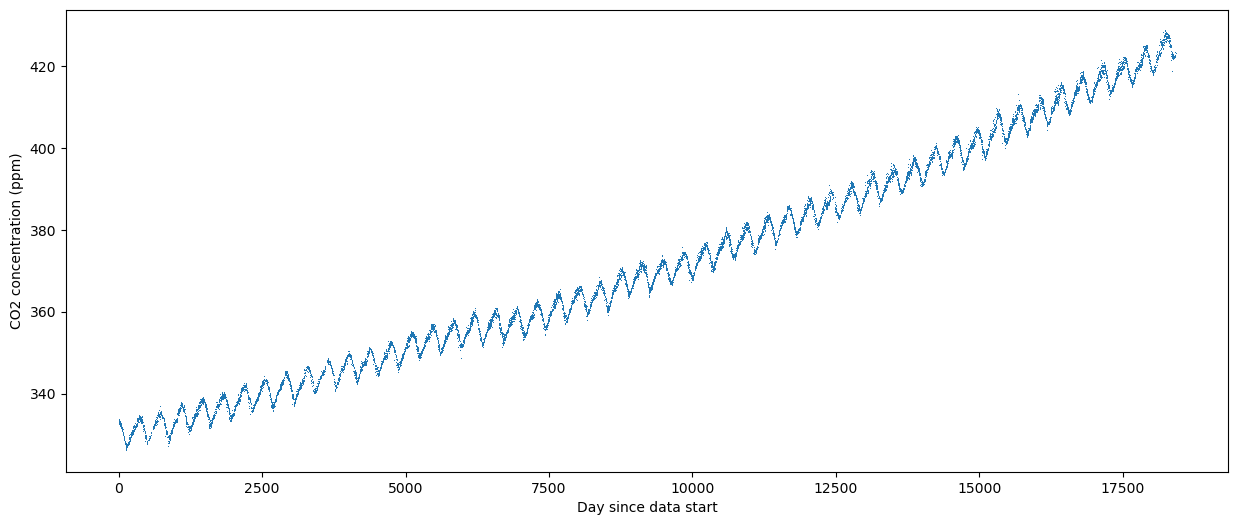

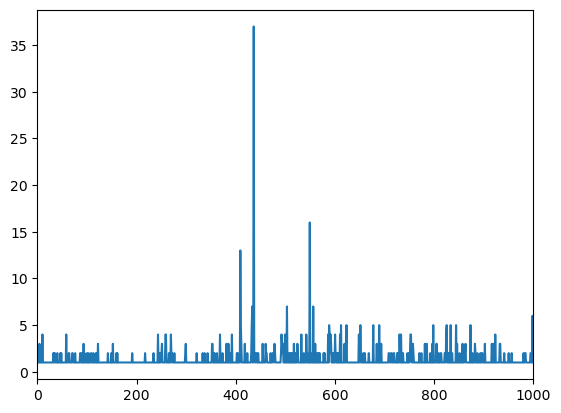

In [240]:
# Load Mauna Loa CO2 daily data

# Loaded the data
co2_daily = np.loadtxt("co2_daily_mlo.txt")

#print (sunspots.shape)

print(co2_daily.shape)

date_decimal = co2_daily[:,3]
co2 = co2_daily[:,4]
date_year = co2_daily[:,0]
date_month = co2_daily[:,1]
date_day = co2_daily[:,2]


days_since_1970 = np.zeros(co2.size)

for i in np.arange(co2.size):
    days_since_1970[i] = (datetime.datetime(int(date_year[i]),int(date_month[i]),int(date_day[i])) - datetime.datetime(1970,1,1)).days


print(days_since_1970)


#t_n = date - date[0]
t_n = days_since_1970 - days_since_1970[0]
y_n = co2_daily[:,4]

# Plot # sunspot vs time in month number 
plt.figure(figsize=(15,6))

#plt.plot(date,co2,',')
plt.plot(t_n,y_n,',')
plt.xlabel("Day since data start")
plt.ylabel("CO2 concentration (ppm)")
plt.show()


plt.plot(t_n[1:]-t_n[0:-1])
plt.xlim([0,1000])
plt.show()

#print((date[1:1001]-date[0:1000])*365)

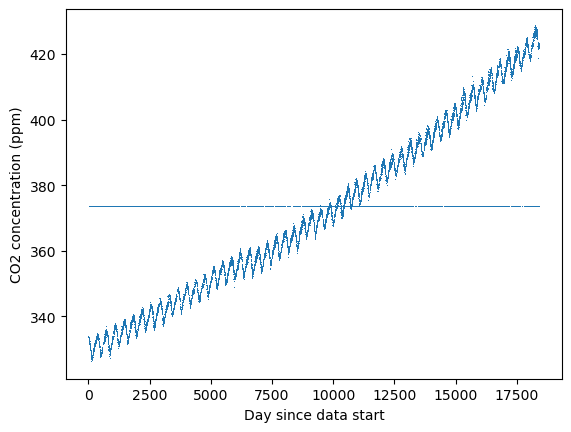

In [281]:
# Now make an evenly spaced array for day and data, with zeros:

N = int(t_n[-1])+1

t_all = np.arange(N)
y_all_origional = np.zeros(N)
y_all = np.zeros(N)+np.mean(y_n)

for i in np.arange(t_n.size):
    y_all_origional[int(t_n[i])] = y_n[i]
    y_all[int(t_n[i])] = y_n[i]

plt.plot(t_all,y_all,',')
plt.xlabel("Day since data start")
plt.ylabel("CO2 concentration (ppm)")
plt.show()




[ 6.87746153e+06+0.00000000e+00j  4.72579875e+04+2.21614126e+05j
  1.83072987e+03+1.08566243e+05j ... -4.02752040e+02+5.83427292e+01j
 -1.17646663e+03-1.86447742e+02j -6.32536335e+02+3.01381218e+02j]
freq =  [0.00000000e+00 5.42740841e-05 1.08548168e-04 ... 4.99864315e-01
 4.99918589e-01 4.99972863e-01]
period =  [           inf 1.84250000e+04 9.21250000e+03 ... 2.00054289e+00
 2.00032570e+00 2.00010855e+00]


/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_34588/1387663786.py:11: RuntimeWarning: divide by zero encountered in divide
  per = 1/freq   # Period in months


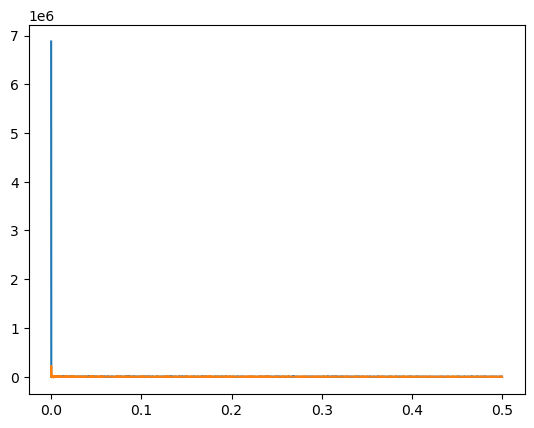

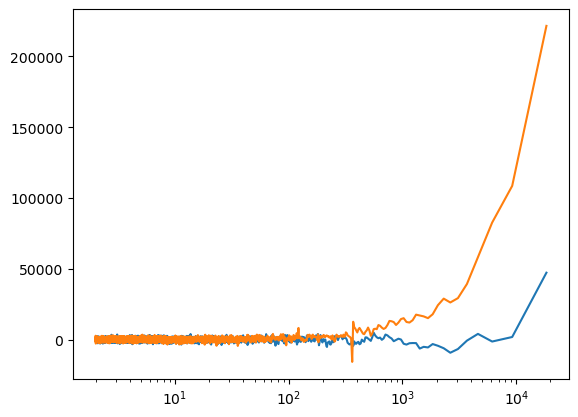

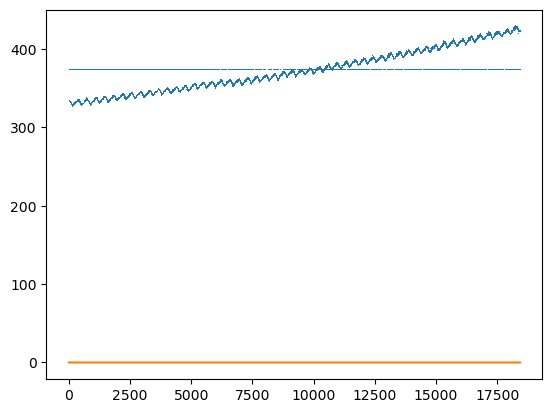

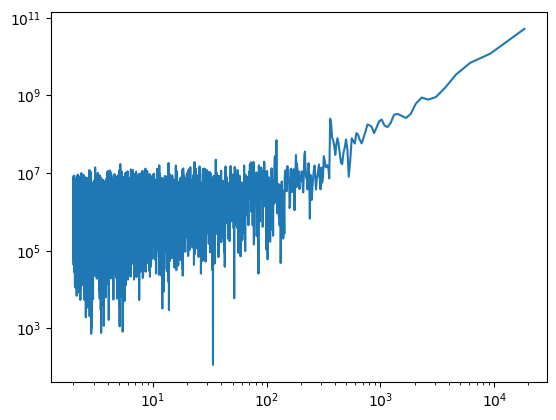

In [248]:
# Now try doing a weighted FFT:

ff_a = np.fft.rfft(y_all)

inverse_ff_a = np.fft.irfft(ff_a,N)
#inverse_ff_a = np.fft.ifft(np.abs(ff_a))

print(ff_a)

freq = np.arange(ff_a.size)/y_all.size   # Frequency in per month
per = 1/freq   # Period in months


print('freq = ',freq)
print('period = ',per)

plt.plot(freq,np.real(ff_a))
plt.plot(freq,np.imag(ff_a))
#plt.plot(np.abs(ff_a))
#plt.yscale('log')
#plt.xlim(0,30)
plt.show()

plt.plot(per,np.real(ff_a))
plt.plot(per,np.imag(ff_a))
#plt.plot(np.abs(ff_a))
plt.xscale('log')
#plt.xlim(100,300)
plt.show()


plt.plot(np.real(inverse_ff_a),',')
plt.plot(np.imag(inverse_ff_a))
plt.show()


plt.plot(per,np.abs(ff_a)**2)
plt.xscale('log')
plt.yscale('log')
plt.show()



[ 6.87746153e+06     +0.j          4.72579875e+04+221614.12626616j
  1.83072987e+03+108566.24299477j ... -1.37047522e+03 -82675.9109604j
  1.83072986e+03-108566.24299487j  4.72579875e+04-221614.12626559j]


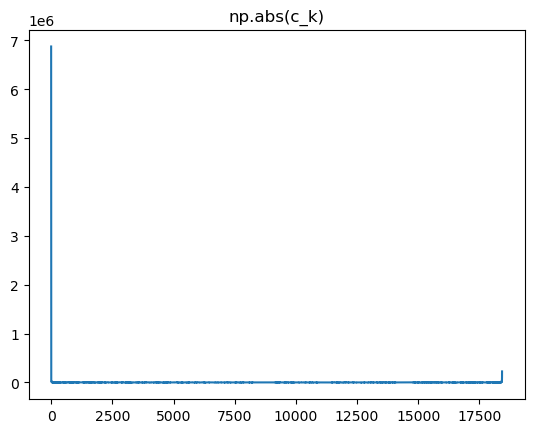

Average CO2 concentration =  (373.26792563853866+0j)


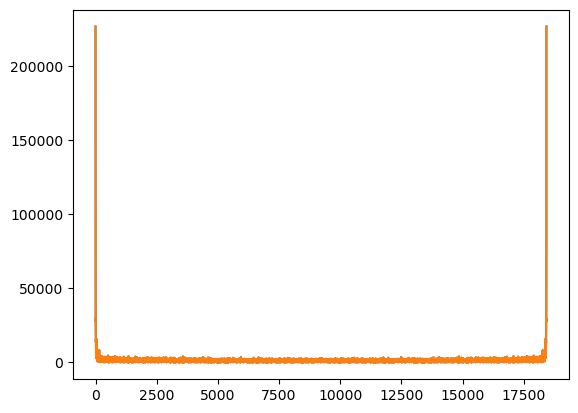

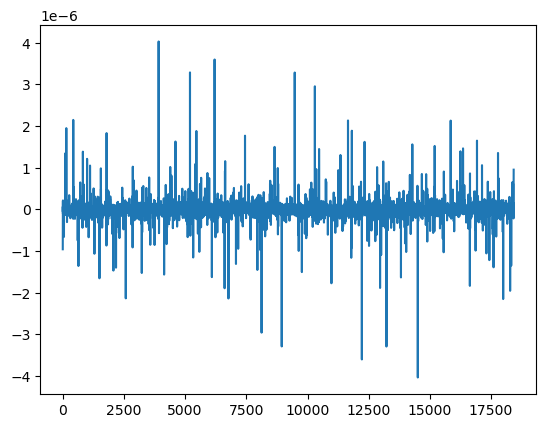

In [249]:
# My version???

def my_DFT(y):
    N = y.size
    c_k = np.zeros(N,dtype=complex)
    n = np.arange(N)+0j
    for k in np.arange(N):
        c_k[k] = np.sum(y*np.exp(-1j*2*np.pi*k*n/N))
    return c_k

#offset = 100
#t_n = t_n[offset:]
#y_n = y_n[offset:]



c_k = my_DFT(y_all)

print(c_k)

plt.plot(np.abs(c_k))
plt.title('np.abs(c_k)')
plt.show()


# The k=0 mode is a constant - the average value of our function times N - so we usually ignore it.

print('Average CO2 concentration = ',c_k[0]/N)

# Notice that the absolute value of the transform is symmetic about the middle.  So we can usually just use half:

plt.plot(np.abs(c_k[1:]))
plt.plot(np.abs(np.flip(c_k[1:])))
plt.show()


# The difference between each side nearly zero

plt.plot(np.abs(c_k[1:])-np.abs(np.flip(c_k[1:])))
plt.show()



1
1 18425


/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_34588/3062565515.py:17: RuntimeWarning: divide by zero encountered in divide
  period = 1/freq   # Period in months


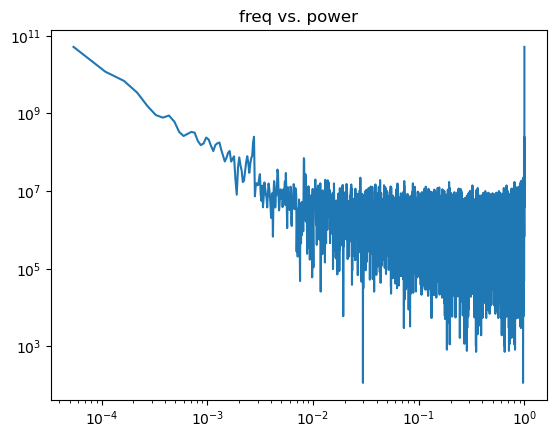

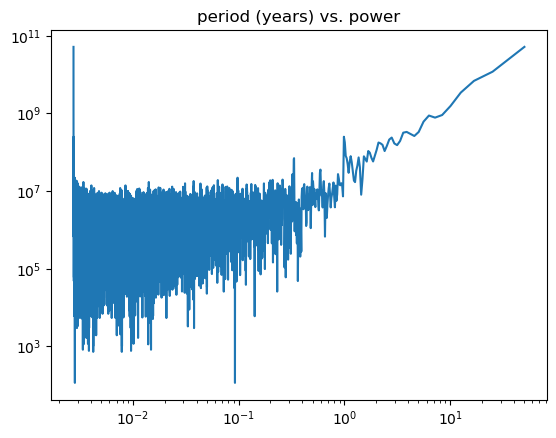

[0.00000000e+00 5.42740841e-05 1.08548168e-04 ... 4.99810041e-01
 4.99864315e-01 4.99918589e-01]
[           inf 1.84250000e+04 9.21250000e+03 ... 2.00076013e+00
 2.00054289e+00 2.00032570e+00]
[0.00000000e+00 5.42740841e-05 1.08548168e-04 ... 9.99782904e-01
 9.99837178e-01 9.99891452e-01]
[           inf 1.84250000e+04 9.21250000e+03 ... 1.00021714e+00
 1.00016285e+00 1.00010856e+00]


/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_34588/3062565515.py:42: RuntimeWarning: divide by zero encountered in divide
  print(1/freq[0:int((N-1)/2)])
/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_34588/3062565515.py:45: RuntimeWarning: divide by zero encountered in divide
  print(1/freq[0:-1])


In [250]:
# Each c_k corresponds to a wavenumber k

# We can chage k into a period by using t_n.  For the sunspot data, t_n is in months

dt = t_all[1]-t_all[0]
max_t = dt*N

print(dt)

print(dt,max_t)
#period = max_t/np.arange(N)   
#freq = 1/(period)
#freq = 1/(period*20*24*3600)


freq = np.arange(c_k.size)/(N)   # Frequency in per month
period = 1/freq   # Period in months


# The frequency is the cycles per time.


plt.plot(freq[1:],np.abs(c_k[1:])**2)
plt.xscale('log')
plt.yscale('log')
plt.title('freq vs. power')
plt.show()


plt.plot(period[1:]/365,np.abs(c_k[1:])**2)
plt.xscale('log')
#plt.xlim([0,20])
plt.yscale('log')
plt.title('period (years) vs. power')
plt.show()


#print(period[0:int((N-1)/2)])
#print(1/period[0:int((N-1)/2)])

print(freq[0:int((N-1)/2)])
print(1/freq[0:int((N-1)/2)])

print(freq[0:-1])
print(1/freq[0:-1])


# Periodicity

<h3>

As we can see, the Fourier Transform is really useful for picking out a period in the data.  We get something around 11 years, the period of the solar cycle.

We'll come back and talk about this some more.

</h3>
    
# Inverse Fourier Trasform

<h3>
    
We can do another transform to go back from wavenumber space to physical space.  How we've defined it, the inverse trasform is:
    
$ y_n = 1/N \sum_{k=0}^{N-1} c_k e^{i 2 \pi k n / N} $

Note that some definitions will be different.  You could have a $1/\sqrt{N}$ on both $c_k$ and $y_n$, or a $1/N$ on $c_k$ rather than $y_n$.


[333.46      +1.05602123e-09j 333.64      +4.23252623e-10j
 333.5       +3.10293430e-10j ... 373.26792564-2.01175785e-11j
 373.26792564-1.62633942e-11j 422.87      +1.52360329e-10j]


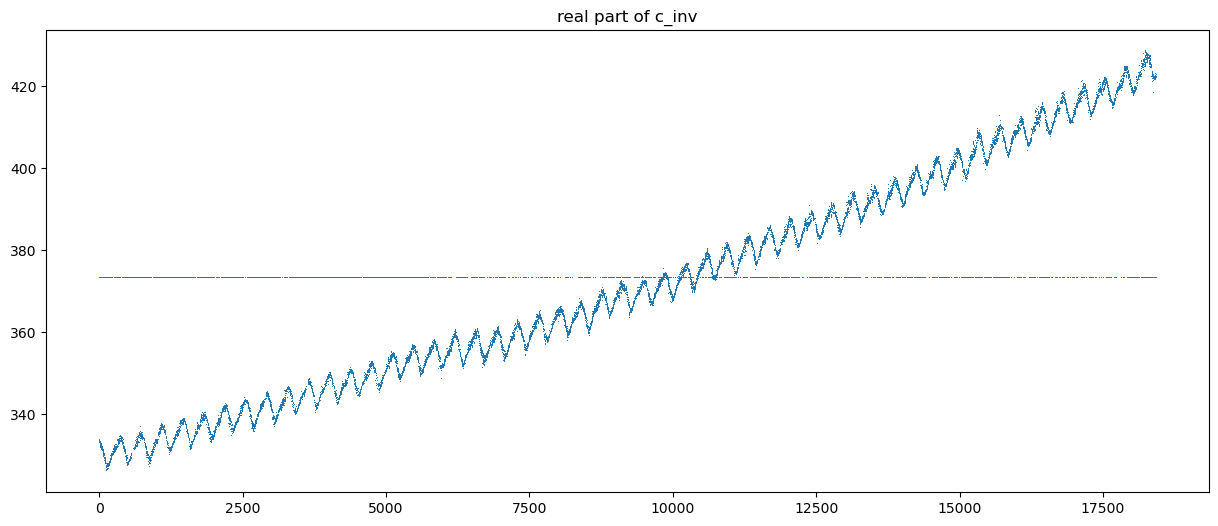

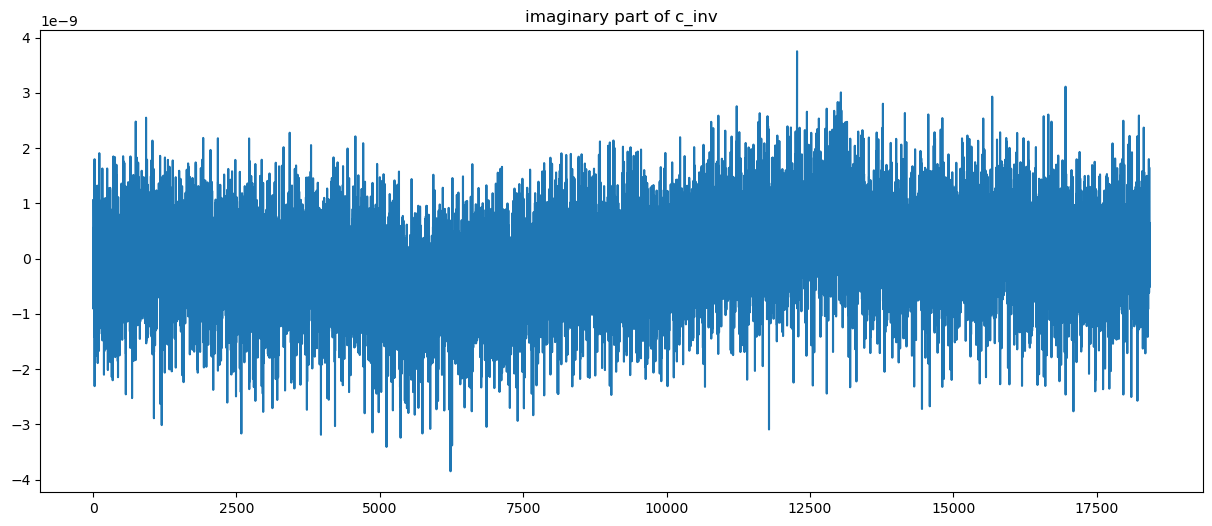

In [251]:
def my_inv_DFT(y):
    N = y.size
    c_k = np.zeros(N,dtype=complex)
    n = np.arange(N)+0j
    #L = x[-1]-x[0]
    for k in np.arange(N):
        c_k[k] = np.sum(y*np.exp(1j*2*np.pi*k*n/N))/N
    return c_k


c_inv = my_inv_DFT(c_k)

plt.figure(figsize=(15,6))

print(c_inv)

plt.plot(np.real(c_inv),',')
plt.title('real part of c_inv')
plt.show()

plt.figure(figsize=(15,6))

plt.plot(np.imag(c_inv))
plt.title('imaginary part of c_inv')
plt.show()

# Filtering and Smoothing

<h3>
    
Another use of the fourier transform is filtering.  We do the transform, then get rid of the frequencies we don't want.  For exmaple, we can make a high-pass or low-pass filter with a Fourier transform.  Or we can smooth our data by removing the high frequencies. 
  
</h3>
    
## Note that smoothing is different than fitting a function - we are not assuming any underlying shape to our data to begin with
    
<h3>
    
Below, we smooth the sunspot data by taking out period shorter than 24, 96, and 360 months using np.argwhere:
    

26


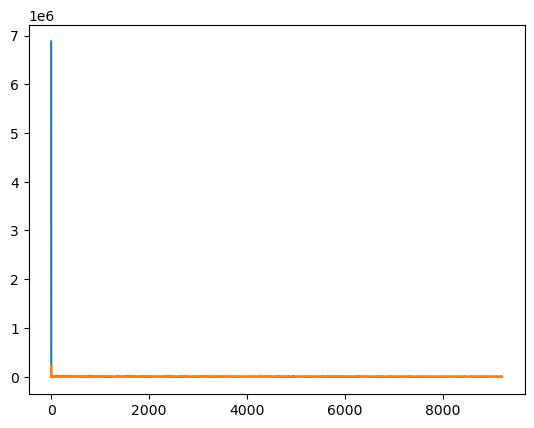

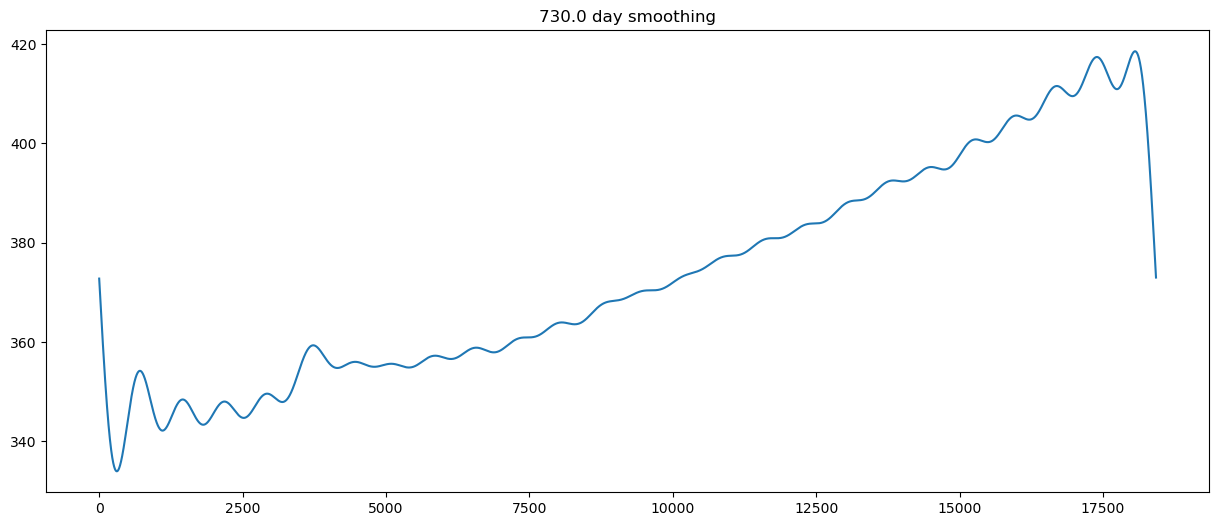

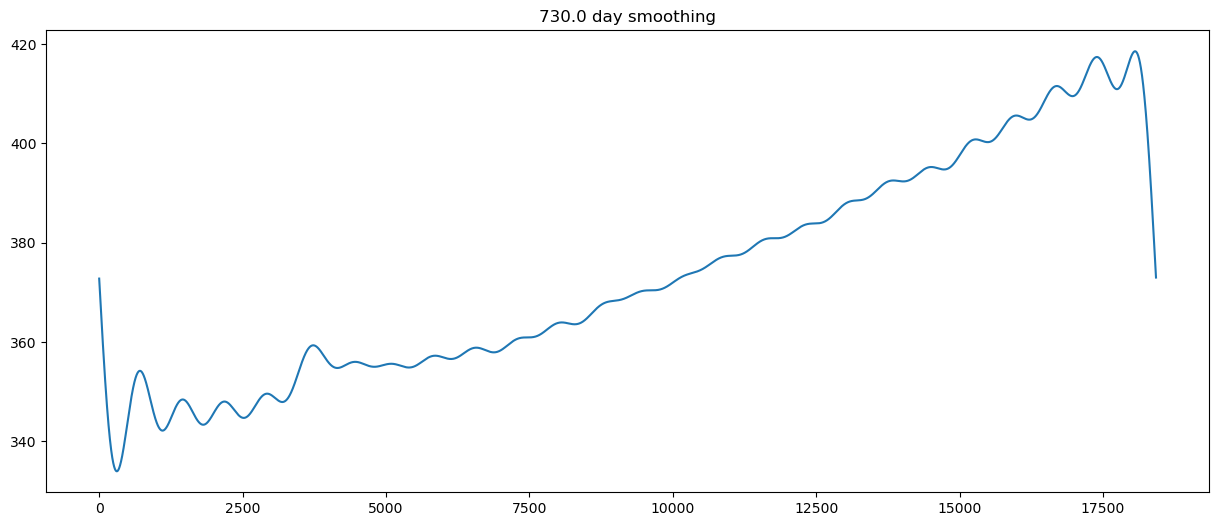

In [257]:
ff_a = np.fft.rfft(y_all)


min_period = 365*2.

ww = np.argwhere(period > min_period)
ww = ww[:,0]

#print(ww)

#print((24+(N-1)/2))

wwi = np.argwhere(period > min_period)
wwi = wwi[:,0]

print(wwi.size)

ww = np.zeros(N) #+1.
ww[wwi] = 1
ww[-wwi] = 1

#ww = np.ones(N)
#ww[0] = 0

c_k_ww = c_k*ww



#inverse_ff_a = np.fft.ifft(ff_a)
#inverse_ff_a = np.fft.irfft(ff_a[ww],N)
inverse_ff_a = my_inv_DFT(c_k_ww)

plt.plot(np.real(ff_a))
plt.plot(np.imag(ff_a))
#plt.plot(np.abs(ff_a))
#plt.yscale('log')
#plt.xlim(0,30)
plt.show()


#plt.figure(figsize=(15,6))
#
#plt.plot(sunspots[ :, 0],sunspots[: , 1])
#plt.xlabel("Number of Month since  Jan 1749")
#plt.ylabel("Number of sunspots")
#plt.show()



plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_a))
#plt.plot(np.imag(inverse_ff_a))
plt.title(str(min_period)+' day smoothing')
plt.show()




ww = np.argwhere(period > min_period)
ww = ww[:,0]
inverse_ff_a = np.fft.irfft(ff_a[ww],N)


plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_a))
#plt.plot(np.imag(inverse_ff_a))
plt.title(str(min_period)+' day smoothing')
plt.show()



## Filtering

<h3>

We can also sue Fourier transforms to get rid of low-frequency data, or both high and low frequencies.

Let's get rid of the period signal and just see how noisy our sunsport data is:

</h3>

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204]
18425
7733


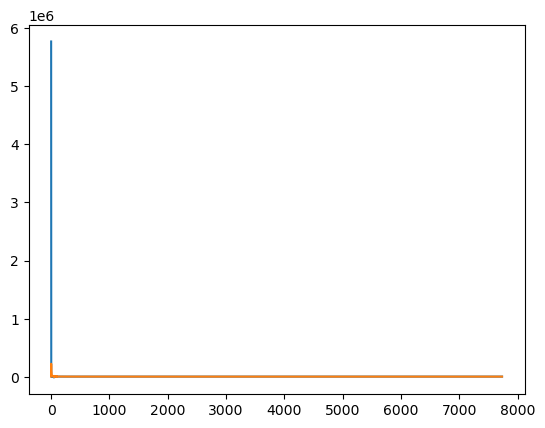

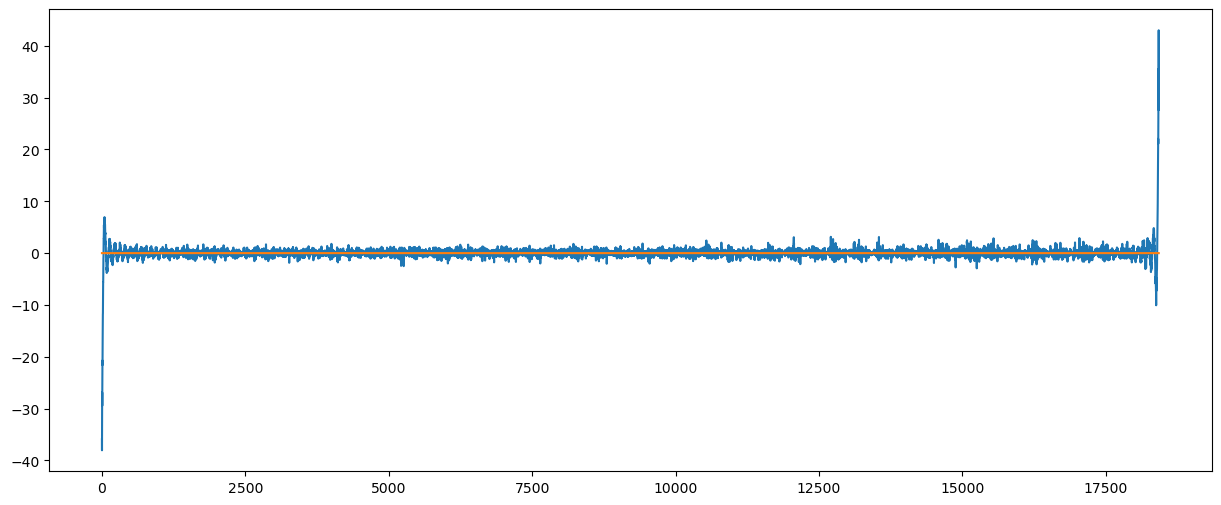

In [258]:
ff_a = np.fft.rfft(y_n)

wz = np.argwhere(period[0:ff_a.size] > 90)   # Need to limit the period to half the full size.
wz = wz[:,0]

ff_b = np.copy(ff_a)
ff_b[wz] = 0.

print(wz)
print(period.size)
print(ff_b.size)

#inverse_ff_a = np.fft.ifft(ff_a)
inverse_ff_a = np.fft.irfft(ff_b,N)


plt.plot(np.real(ff_a))
plt.plot(np.imag(ff_a))
#plt.plot(np.abs(ff_a))
#plt.yscale('log')
#plt.xlim(0,30)
plt.show()


#plt.figure(figsize=(15,6))
#
#plt.plot(sunspots[ :, 0],sunspots[: , 1])
#plt.xlabel("Number of Month since  Jan 1749")
#plt.ylabel("Number of sunspots")
#plt.show()



plt.figure(figsize=(15,6))

#plt.plot(sunspots[ :, 0],sunspots[: , 1])
plt.plot(np.real(inverse_ff_a))
plt.plot(np.imag(inverse_ff_a))
#plt.title('24 month smoothing')
plt.show()




<h3>

So we see some noise.  Does seem to still be some structure here - looks like more nosie when there's more sunspots.

Now let's filter our long and short periods, so we just see the period signal.  Note that this will also remove the average.
    
</h3>

18425
7733


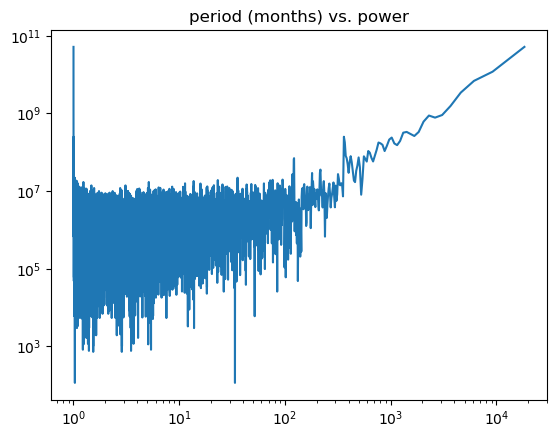

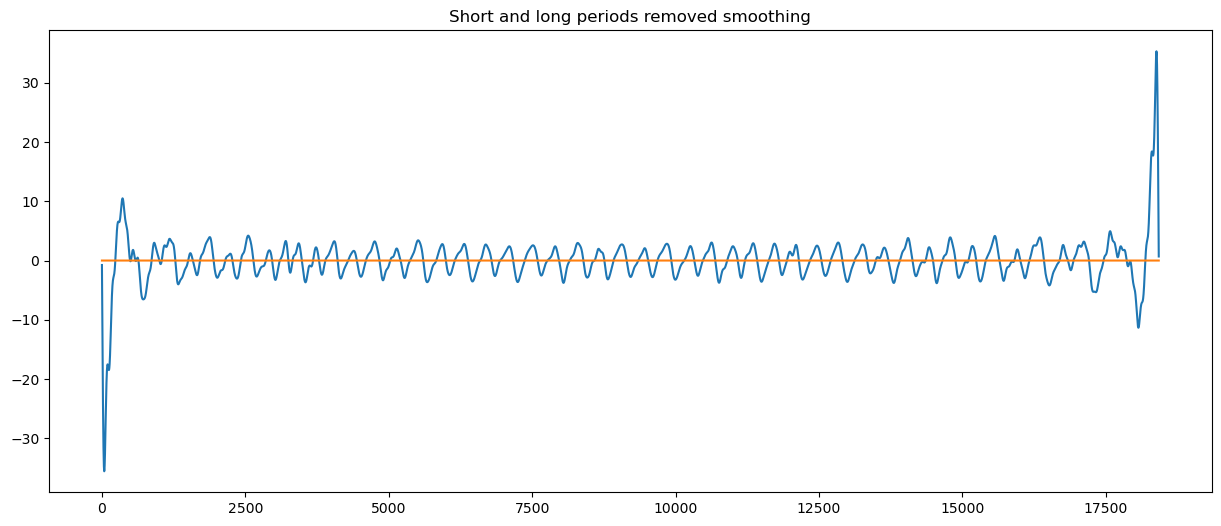

In [259]:
ff_a = np.fft.rfft(y_n)

# Keep more than some number of months

wz = np.argwhere(period[0:ff_a.size] < 90)
wz = wz[:,0]

ff_b = np.copy(ff_a)
ff_b[wz] = 0.

# And keep less than some number of months

wz2 = np.argwhere(period > 365*2)   
wz2 = wz2[:,0]

ff_b[wz2] = 0.

print(period.size)
print(ff_b.size)

#inverse_ff_a = np.fft.ifft(ff_a)
inverse_ff_a = np.fft.irfft(ff_b,N)


# Take a look at the Fourier transform again:

plt.plot(period[1:],np.abs(c_k[1:])**2)
plt.xscale('log')
#plt.xlim([0,20])
plt.yscale('log')
plt.title('period (months) vs. power')
plt.show()



#plt.figure(figsize=(15,6))

#plt.plot(sunspots[ :, 0],sunspots[: , 1])
#plt.xlabel("Number of Month since  Jan 1749")
#plt.ylabel("Number of sunspots")
#plt.show()



plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_a))
plt.plot(np.imag(inverse_ff_a))
plt.title('Short and long periods removed smoothing')
plt.show()




## Period Search

<h3>

We found a pretty good period of about 11 years, but really only certain period are in out data, based on how long our data series is.

We'd like a way to search over more period and find a real best period.

I'm not sure if this is the best way to do it, but let's try truncating our data at the beginning to vary the period allowed.
    
</h3>

Periods in years and power = 
921.25 1.32e+08
877.38 1.37e+08
837.50 1.10e+08
801.09 1.07e+08
767.71 1.01e+08
737.00 9.33e+07
708.65 9.29e+07
682.41 7.68e+07
658.04 7.83e+07
635.34 7.01e+07
614.17 6.92e+07
594.35 6.57e+07
575.78 5.38e+07
558.33 5.31e+07
541.91 5.43e+07
526.43 5.22e+07
511.81 5.01e+07
497.97 5.00e+07
484.87 3.13e+07
472.44 4.08e+07
460.62 3.45e+07
449.39 3.51e+07
438.69 2.80e+07
428.49 5.94e+07
418.75 4.60e+07
409.44 1.06e+07
400.54 1.69e+08
392.02 1.27e+08
383.85 2.51e+08
376.02 1.32e+07
368.50 5.87e+07
361.27 6.09e+05
354.33 1.03e+07
347.64 3.99e+07
341.20 1.36e+07
335.00 2.61e+07
329.02 3.58e+07
323.25 4.86e+07
317.67 4.42e+07
312.29 2.60e+07
307.08 7.47e+06
302.05 3.73e+06
297.18 1.03e+07
292.46 1.67e+07
287.89 8.64e+06
283.46 1.66e+06
279.17 1.21e+06
275.00 7.65e+06
270.96 7.89e+06
267.03 8.42e+06
263.21 4.54e+06
259.51 3.20e+06
255.90 7.09e+06
252.40 9.92e+06
248.99 1.14e+07
245.67 8.20e+06
242.43 7.84e+06
239.29 5.49e+06
236.22 7.57e+06
233.23 1.19e+07


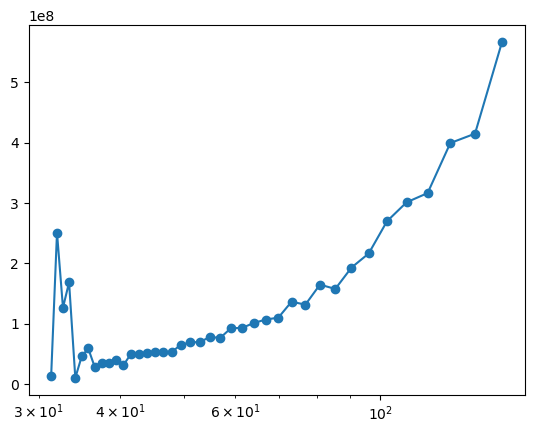

In [261]:
# First, print the periods we have available using all out data:

print('Periods in years and power = ')
for i in np.arange(20,80):
    print('%.2f %.2e' % (per[i],np.abs(ff_a[i])**2))

plt.plot(per[10:50]/12,np.abs(ff_a[10:50])**2,'-o')
plt.xscale('log')
plt.show()



/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_34588/4266136321.py:13: RuntimeWarning: divide by zero encountered in divide
  per_i = 1/freq_i   # Period in months


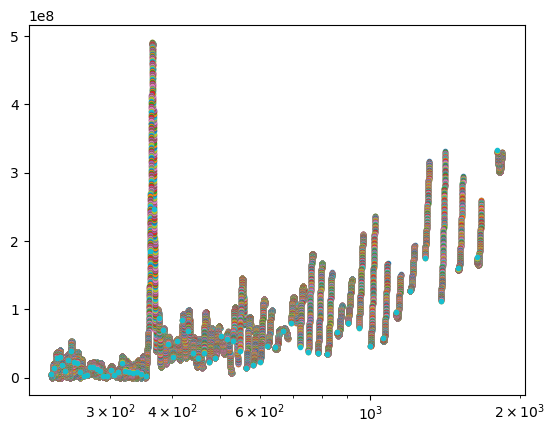

N =  18425 18425


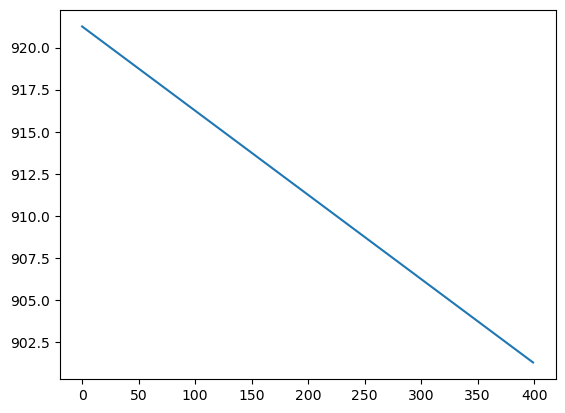

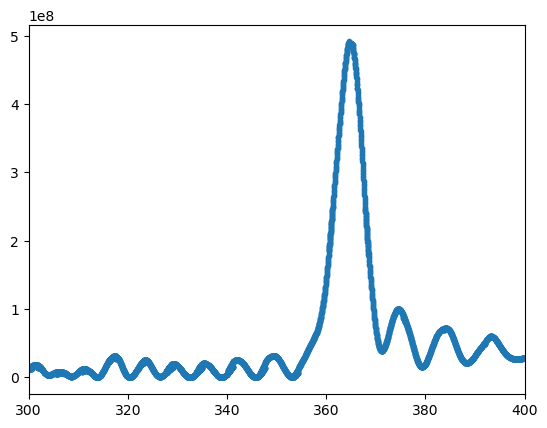

11490
364.68 491374994.9234496


In [266]:
# Now scan over a range of frequencies

n_scan = 400   # how many sets of data to scan over
n_keep = 1000  # how many values of the period to keep

per_arr = np.zeros([n_scan,n_keep])
power_arr = np.zeros([n_scan,n_keep])

for i in np.arange(0,n_scan):
    ff_i = np.fft.rfft(y_all[i:])

    freq_i = np.arange(ff_a.size)/y_all[i:].size   # Frequency in per month
    per_i = 1/freq_i   # Period in months

    per_arr[i,:] = per_i[0:n_keep]
    power_arr[i,:] = np.abs(ff_i[0:n_keep])**2 # /y_n[i:].size**2


for i in np.arange(0,n_scan):
    plt.plot(per_arr[i,10:80],power_arr[i,10:80],'.')

plt.xscale('log')
plt.show()

print('N = ',N,y_all.size)

plt.plot(per_arr[:,20])
plt.show()

per_arr_flat = per_arr[:,20:80].flatten()
power_arr_flat = power_arr[:,20:80].flatten()

plt.plot(per_arr_flat,power_arr_flat,'.')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([300,400])
plt.show()

pmax = np.argmax(power_arr_flat)
print(pmax)

print(per_arr_flat[pmax],power_arr_flat[pmax])


<h3>

Maximum period power at 365 days-ish  
</h3>

# FFT with interpolaton

<h3>

We can probably do a better job if we use interpolation to fill in the missing data, instead of zero.  May also not need as much filtering.

</h3>

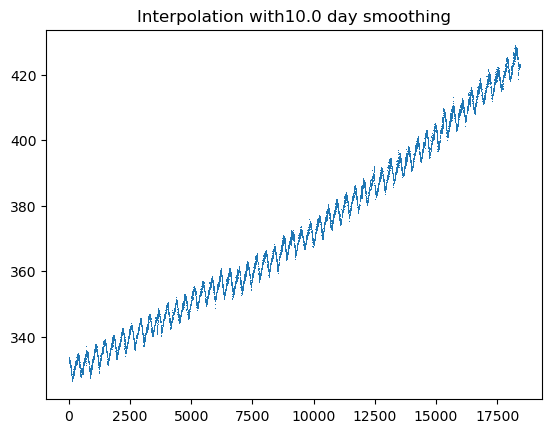

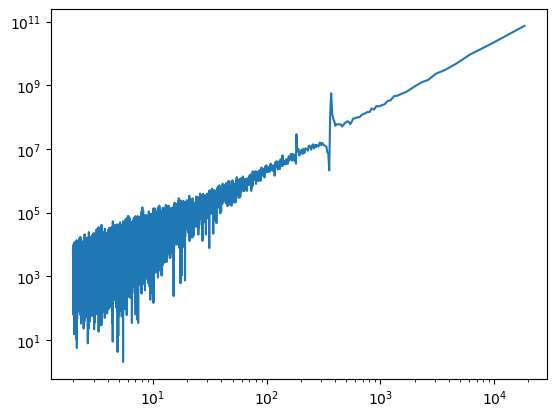

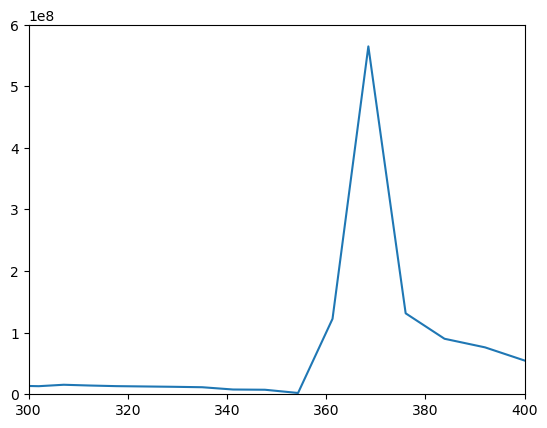

In [276]:
# Try some interpolation:

interp_func = scipy_interpol.CubicSpline(t_n,y_n)

y_interp = interp_func(t_all)

plt.plot(y_interp,',')
#plt.plot(y_all,',')
#plt.plot(np.real(inverse_ff_a),',')
plt.title('Interpolation with'+str(min_period)+' day smoothing')
plt.show()

# Now do our fft on the interpolated data

ff_a = np.fft.rfft(y_interp)

plt.plot(per,np.abs(ff_a)**2)
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(per,np.abs(ff_a)**2)
#plt.yscale('log')
#plt.xscale('log')
plt.xlim([300,400])
plt.ylim([0,6.e8])
plt.show()


/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_34588/3768094047.py:13: RuntimeWarning: divide by zero encountered in divide
  per_i = 1/freq_i   # Period in months


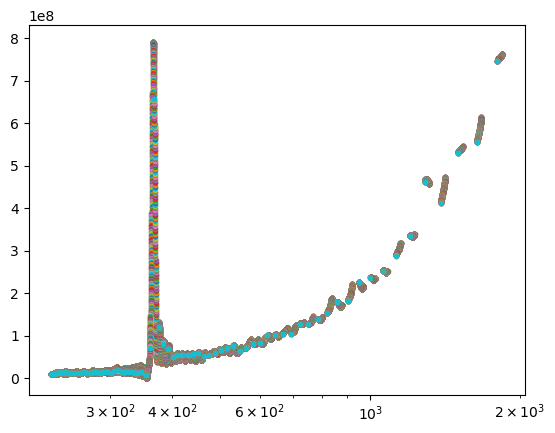

N =  18425 18425


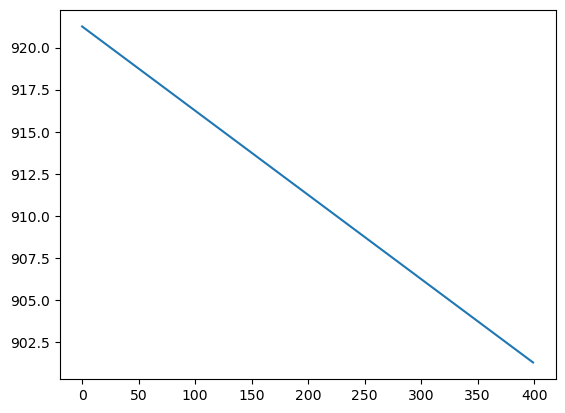

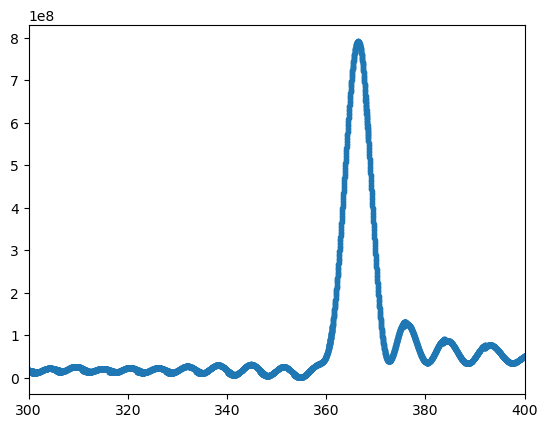

6270
366.41999999999996 791914720.3166597


In [277]:
# Now scan over a range of frequencies

n_scan = 400   # how many sets of data to scan over
n_keep = 1000  # how many values of the period to keep

per_arr = np.zeros([n_scan,n_keep])
power_arr = np.zeros([n_scan,n_keep])

for i in np.arange(0,n_scan):
    ff_i = np.fft.rfft(y_interp[i:])

    freq_i = np.arange(ff_a.size)/y_interp[i:].size   # Frequency in per month
    per_i = 1/freq_i   # Period in months

    per_arr[i,:] = per_i[0:n_keep]
    power_arr[i,:] = np.abs(ff_i[0:n_keep])**2 # /y_n[i:].size**2


for i in np.arange(0,n_scan):
    plt.plot(per_arr[i,10:80],power_arr[i,10:80],'.')

plt.xscale('log')
plt.show()

print('N = ',N,y_interp.size)

plt.plot(per_arr[:,20])
plt.show()

per_arr_flat = per_arr[:,20:80].flatten()
power_arr_flat = power_arr[:,20:80].flatten()

plt.plot(per_arr_flat,power_arr_flat,'.')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([300,400])
plt.show()

pmax = np.argmax(power_arr_flat)
print(pmax)

print(per_arr_flat[pmax],power_arr_flat[pmax])


<h3>

Looks a little better.  There's a nice spike at about a year.

Let' try some filtering:
    
</h3>

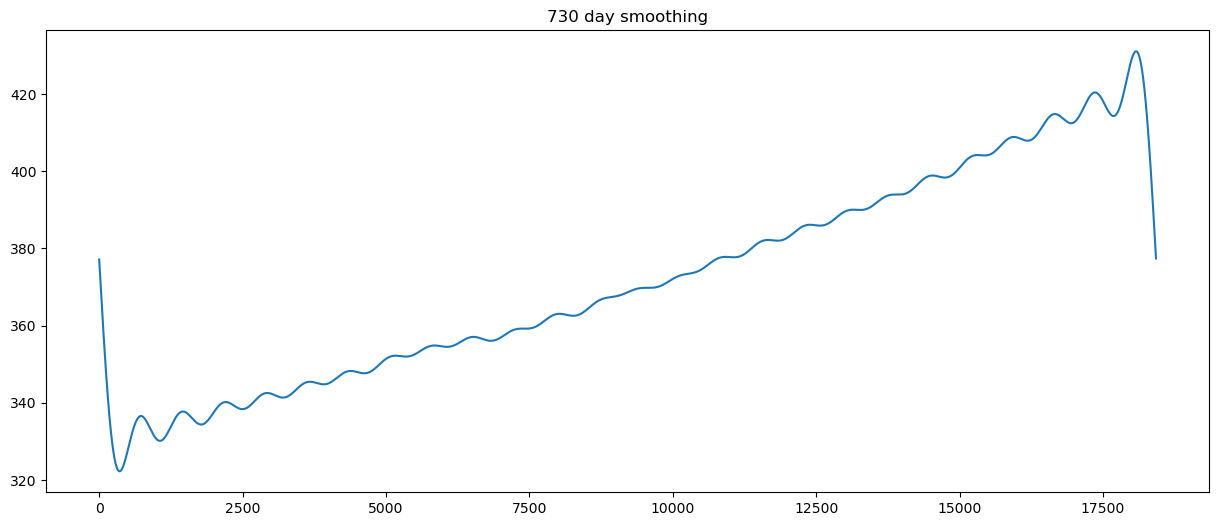

In [278]:
# Filter out high frequencies

min_period = 365*2

ww = np.argwhere(period > min_period)
ww = ww[:,0]
inverse_ff_a = np.fft.irfft(ff_a[ww],N)


plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_a))
#plt.plot(np.imag(inverse_ff_a))
plt.title(str(min_period)+' day smoothing')
plt.show()


<h3>

Still doesn't look too good.  Let's try subtract out the high-frequenct component.
    
</h3>

18425
9213


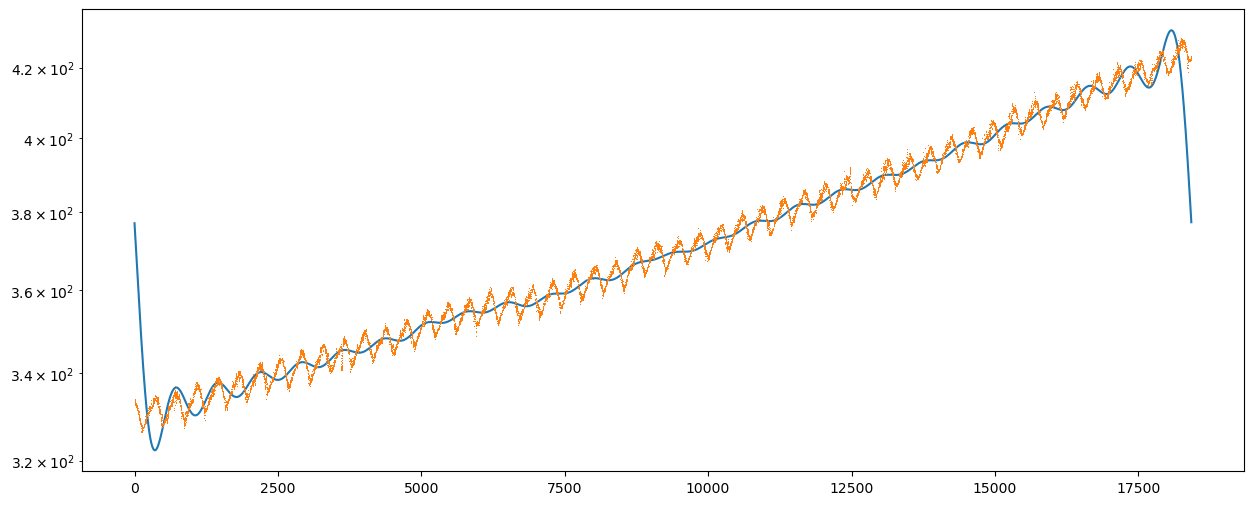

In [288]:
ff_a = np.fft.rfft(y_interp)

wz = np.argwhere(period[0:ff_a.size] > 365*2.)   # Need to limit the period to half the full size.
wz = wz[:,0]

ff_b = np.copy(ff_a)
ff_b[wz] = 0.

#print(wz)
print(period.size)
print(ff_b.size)

#inverse_ff_a = np.fft.ifft(ff_a)
inverse_ff_b = np.fft.irfft(ff_b,N)




plt.figure(figsize=(15,6))

#plt.plot(sunspots[ :, 0],sunspots[: , 1])
plt.plot(y_interp-np.real(inverse_ff_b))
#plt.plot(inverse_ff_a)
plt.plot(y_interp,',')
plt.yscale('log')

#plt.plot(np.imag(inverse_ff_a))
#plt.title('24 month smoothing')
plt.show()



<h3>

Looks the same.

We could also use out initial filtered fft to use for interpolation. Let's try using our smoothed fft data to fill in the missing values:
    
</h3>

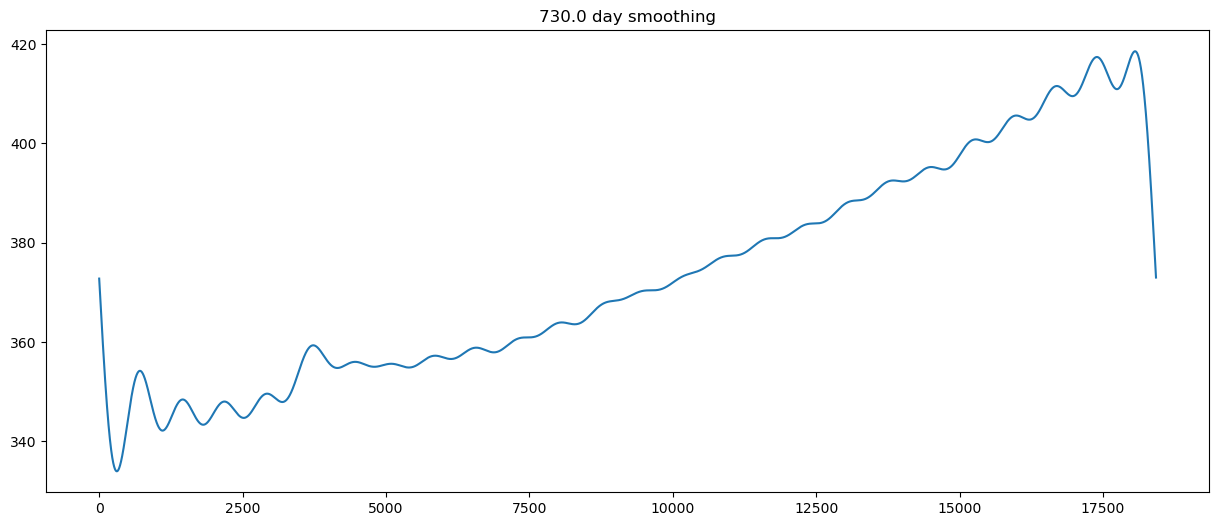

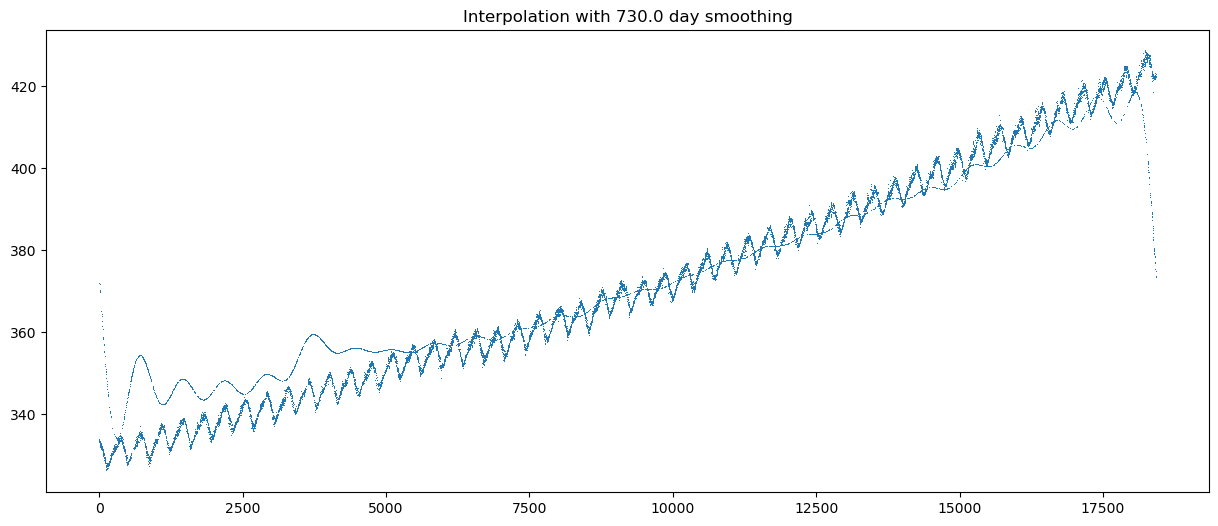

In [283]:
# Fill in with the smoothed data from the inverse FFT:

ff_a = np.fft.rfft(y_all)


min_period = 365*2.



ww = np.argwhere(period > min_period)
ww = ww[:,0]
inverse_ff_c = np.fft.irfft(ff_a[ww],N)


plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_c))
#plt.plot(np.imag(inverse_ff_a))
plt.title(str(min_period)+' day smoothing')
plt.show()



y_interp_c = np.copy(y_all)

y_interp_c = np.where(y_all_origional > 0,y_all,np.real(inverse_ff_c))

plt.figure(figsize=(15,6))

plt.plot(y_interp_c,',')
#plt.plot(y_all,',')
#plt.plot(np.real(inverse_ff_c),',')
plt.title('Interpolation with '+str(min_period)+' day smoothing')
plt.show()
